In [2]:
# Importing dependencies and libraries
import numpy as np
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import os
import datetime

from config import api_key


In [3]:
# Looking at stock performance by industry relevant indexes

# Variable initialization
close_daily_price =[]
ticker_date = []
delta = datetime.timedelta(days=1)

# Search parameters
industry_index = ['XPH']
start_date = datetime.datetime(2019,8,1)
end_date = datetime.datetime(2020,7,31)
base_url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY'

# For loop to make the call for every industry index and retrieving the data
for index in industry_index:
    
    # Building the search url
    url = f'{base_url}&symbol={index}&outputsize=full&apikey={api_key}'
    
    # Making the API call
    response = requests.get(url)
    response_json = response.json()
    
    # Retrieving daily closing prices
    while start_date <= end_date:
    
        # Obtaining date as string
        string_date = start_date.strftime("%Y-%m-%d")

        # Exception for dates with no operation
        try:
            close_daily_price.append(response_json['Time Series (Daily)'][string_date]["4. close"]) 
        except (KeyError):
            close_daily_price.append('nAn')
        ticker_date.append(start_date)
            
        start_date += delta
        

In [4]:
# Building the results dataframe

ticker_value_df = pd.DataFrame({'Date': ticker_date, 'Close XPH': close_daily_price})

ticker_value_df

,Date,Close XPH
0,2019-08-01,37.9500
1,2019-08-02,37.6900
2,2019-08-03,nAn
3,2019-08-04,nAn
4,2019-08-05,36.6100
...,...,...
361,2020-07-27,43.3900
362,2020-07-28,43.0600
363,2020-07-29,43.2600
364,2020-07-30,43.3100


In [5]:
#Delet null values
clean_df=ticker_value_df.loc[ticker_value_df["Close XPH"]!='nAn']
clean_df

,Date,Close XPH
0,2019-08-01,37.9500
1,2019-08-02,37.6900
4,2019-08-05,36.6100
5,2019-08-06,36.7200
6,2019-08-07,36.7700
...,...,...
361,2020-07-27,43.3900
362,2020-07-28,43.0600
363,2020-07-29,43.2600
364,2020-07-30,43.3100


In [13]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
#Formula avarage price ultimo precio-el primero/ultimo
first_price=clean_df.loc[clean_df["Date"]=='2019-08-01',:]
first_price

last_price=clean_df.loc[clean_df["Date"]=='2020-07-31',:]
last_price

ava_price=(first_price-last_price)/last_price

#xph=clean_df['Close XPH'].value_counts()

#xph.plot(kind="bar")
#plt.xlabel("Date")
#plt.ylabel("Close XPH")
#plt.show()

TypeError: cannot perform __rtruediv__ with this index type: DatetimeArray

In [7]:
#Describe data
clean_df.describe()

<ipython-input-7-bd7678952501>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  clean_df.describe()


,Date,Close XPH
count,8,8
unique,8,8
top,2020-01-03 00:00:00,46.2800
freq,1,1
first,2019-08-01 00:00:00,NaN
last,2020-07-07 00:00:00,NaN


Text(0, 0.5, 'Close XPH')

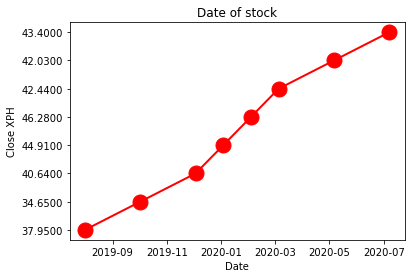

In [8]:
# Generate a scatter plot 
x_axis = clean_df["Date"]
tumsiz = clean_df["Close XPH"]

fig1, ax1 = plt.subplots()
plt.title('Date of stock')
plt.plot(x_axis, tumsiz,linewidth=2, markersize=15,marker="o",color="red", label="Fahreneit")
plt.xlabel('Date')
plt.ylabel('Close XPH')